In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv("WineQT.csv")
data.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


In [35]:
data.describe().T.style.background_gradient(cmap='Oranges')

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.000000,8.311111,1.747595,4.600000,7.100000,7.900000,9.100000,15.900000
volatile acidity,1143.000000,0.531339,0.179633,0.120000,0.392500,0.520000,0.640000,1.580000
citric acid,1143.000000,0.268364,0.196686,0.000000,0.090000,0.250000,0.420000,1.000000
residual sugar,1143.000000,2.532152,1.355917,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1143.000000,0.086933,0.047267,0.012000,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,1143.000000,15.615486,10.250486,1.000000,7.000000,13.000000,21.000000,68.000000
total sulfur dioxide,1143.000000,45.914698,32.782130,6.000000,21.000000,37.000000,61.000000,289.000000
density,1143.000000,0.996730,0.001925,0.990070,0.995570,0.996680,0.997845,1.003690
pH,1143.000000,3.311015,0.156664,2.740000,3.205000,3.310000,3.400000,4.010000
sulphates,1143.000000,0.657708,0.170399,0.330000,0.550000,0.620000,0.730000,2.000000


In [41]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970,-0.275826
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394,-0.007892
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821,-0.139011
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085,-0.088099
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260,0.095268
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710,-0.103954


<Axes: >

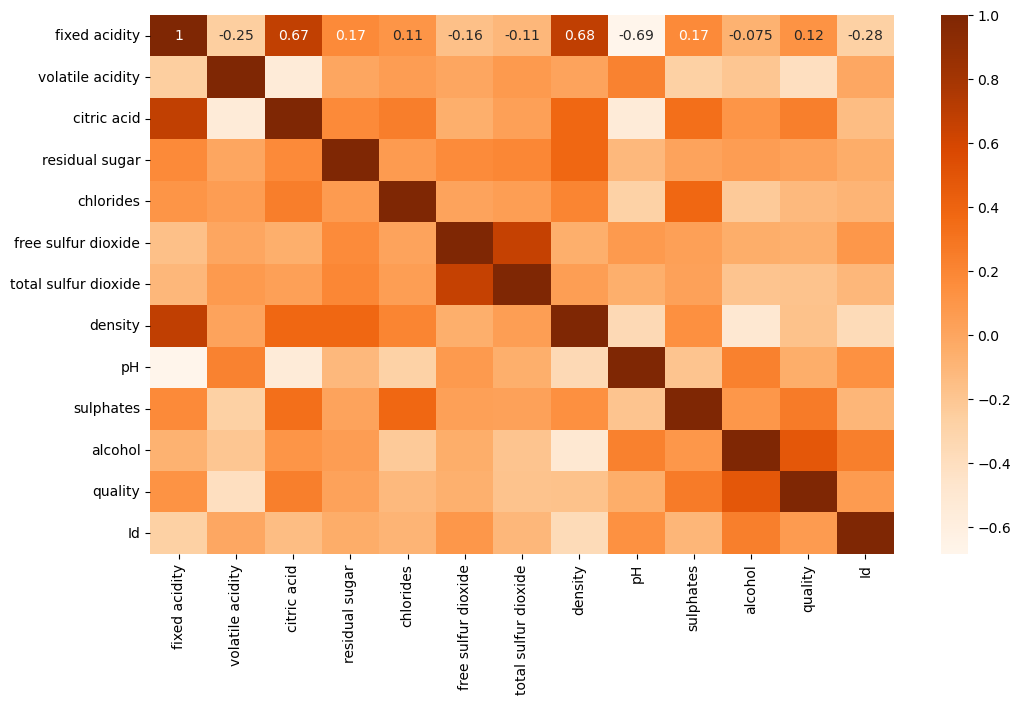

In [44]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(), annot=True, cmap='Oranges')

<Axes: >

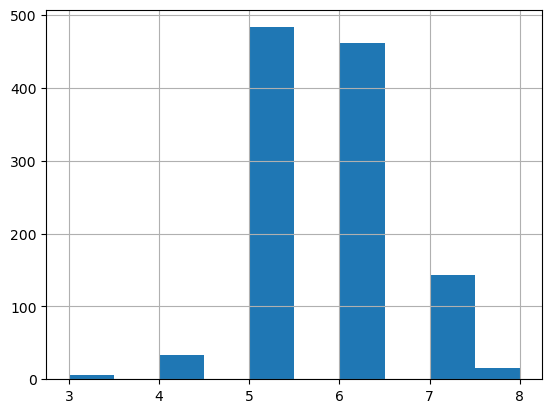

In [3]:
data["quality"].hist()

In [4]:
# we will classify 3,4,5 as bad wine and 6,7,8 as good wine
y= data["quality"]>5
y

0       False
1       False
2       False
3        True
4       False
        ...  
1138     True
1139     True
1140    False
1141     True
1142    False
Name: quality, Length: 1143, dtype: bool

In [5]:
x=data.drop(["quality","Id"], axis=1)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2


In [6]:
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.20, random_state=15)

# Scaling

In [7]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_train

array([[-1.32961555,  0.27004001, -0.33605731, ...,  1.72090554,
         0.08676793,  1.875323  ],
       [-0.46755988, -0.75220993, -0.74498575, ...,  0.37423802,
         0.265117  , -0.14337782],
       [-1.84684895, -0.35466829, -1.25614631, ...,  3.77297034,
        -0.21048052,  2.15060038],
       ...,
       [-0.29514875, -1.09295991,  0.53291564, ...,  0.18185695,
        -0.3888296 , -0.96920997],
       [ 0.50943654,  0.32683167, -0.13159308, ..., -0.33115925,
         0.08676793, -0.78569172],
       [ 0.96919957, -0.41145995,  0.89072803, ...,  0.11772992,
        -0.21048052,  1.60004561]])

In [8]:
scaled_X_test = scaler.transform(X_test)
scaled_X_test

array([[-0.29514875,  0.63918582, -1.35837842, ...,  0.5666191 ,
        -0.62662836, -0.78569172],
       [ 1.71631448, -0.92258492,  1.19742436, ..., -1.03655653,
        -0.50772898,  0.04014044],
       [-0.00779686,  1.77501909, -1.30726237, ...,  0.0536029 ,
        -0.44827929,  0.49893608],
       ...,
       [ 0.39449579, -0.8090016 ,  0.68626381, ..., -0.7159214 ,
         1.03796298,  0.40717695],
       [ 0.04967352,  0.49720666, -0.74498575, ...,  0.43836505,
         1.39466112,  1.2330091 ],
       [-0.75491177,  0.89474831, -1.35837842, ...,  0.24598397,
        -0.32937991, -0.69393259]])

In [9]:
def preprocessing_function(X, y):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=15)
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)

    return scaled_X_train, scaled_X_test, y_train, y_test

# Machine Learning

## Support Vector Classifier(SVC)

In [10]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(scaled_X_train, y_train)

SVC()

In [11]:
svc_prediction = svc.predict(scaled_X_test)
svc_prediction

array([False,  True,  True, False,  True,  True,  True, False, False,
       False, False, False,  True, False, False,  True, False, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False, False,  True,  True, False, False,  True,  True,  True,
        True,  True, False, False, False,  True, False, False, False,
       False,  True,  True, False,  True, False, False,  True,  True,
        True,  True, False, False, False, False, False,  True,  True,
        True, False,  True, False,  True, False, False, False,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
       False, False, False, False,  True, False,  True, False, False,
       False,  True,  True, False,  True,  True,  True,  True, False,
       False,  True, False,  True, False,  True, False, False,  True,
       False, False, False, False,  True,  True,  True, False,  True,
       False, False,  True,  True,  True,  True, False, False, False,
        True,  True,

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
def algo_accuracy(test, predicted):
    matrix = confusion_matrix(test, predicted)
    plt.matshow(confusion_matrix(test, predicted),cmap="coolwarm")
    accuracy= accuracy_score(test, predicted)
    precision= precision_score(test, predicted)
    recall= recall_score(test, predicted)

    return accuracy, precision, recall, matrix 

(0.7205240174672489,
 0.7678571428571429,
 0.6935483870967742,
 array([[79, 26],
        [38, 86]], dtype=int64))

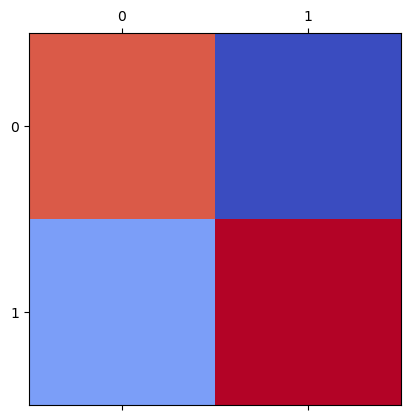

In [64]:
algo_accuracy(y_test, svc_prediction)

In [14]:
#Grid search
from sklearn.model_selection import GridSearchCV

paramgrid= {
    "C" : [0.1, 1, 10],
    "kernel" : ["linear", "rbf", "poly"],
    "gamma" : [10, 1, 0.1]
}

grid_search= GridSearchCV(svc, paramgrid, cv=5, scoring="accuracy")
grid_search.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [10, 1, 0.1],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [15]:
grid_search.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [16]:
grid_search.best_score_

0.7680898336636043

## Random Forest Classifier(RFC)

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
rfc.fit(scaled_X_train, y_train)

RandomForestClassifier()

In [20]:
rfc_prediction= rfc.predict(scaled_X_test)
rfc_prediction

array([False, False, False, False,  True,  True,  True, False, False,
       False, False, False,  True, False, False,  True, False, False,
        True,  True,  True, False,  True,  True,  True,  True, False,
       False, False,  True, False, False, False,  True,  True,  True,
        True,  True, False, False,  True, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
       False, False,  True,  True,  True, False,  True, False, False,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
       False, False, False,  True,  True,  True, False, False,  True,
        True, False,  True,  True,  True,  True, False, False,  True,
       False,  True,

(0.7903930131004366,
 0.8015873015873016,
 0.8145161290322581,
 array([[ 80,  25],
        [ 23, 101]], dtype=int64))

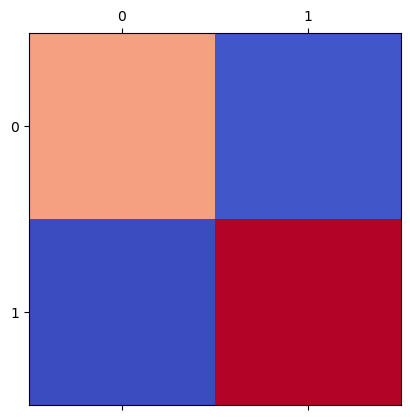

In [65]:
algo_accuracy(y_test, rfc_prediction)

In [24]:
#Grid search
paramgrid_rfc = [
    {"n_estimators": [3,10,30], "max_features":[3,6,9,11]},
    {"bootstrap":[False], "n_estimators": [3,10], "max_features":[3,6,9]}
]
grid_search_rfc= GridSearchCV(rfc, paramgrid_rfc, cv=5, scoring="accuracy", return_train_score= True)
grid_search_rfc.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [3, 6, 9, 11],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [3, 6, 9],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='accuracy')

In [25]:
grid_search_rfc.best_score_

0.7724614183630576

In [28]:
rfc_clf=grid_search_rfc.best_estimator_
rfc_clf

RandomForestClassifier(max_features=9, n_estimators=30)

(0.7467248908296943,
 0.7704918032786885,
 0.7580645161290323,
 array([[77, 28],
        [30, 94]], dtype=int64))

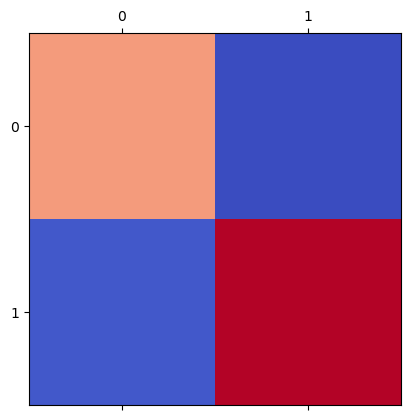

In [66]:
rfc_clf_prediction = rfc_clf.predict(scaled_X_test)
algo_accuracy(y_test, rfc_clf_prediction)

In [67]:
importances= rfc_clf.feature_importances_
importances

array([0.06146089, 0.10052008, 0.04567643, 0.04347705, 0.06543866,
       0.06112833, 0.07567842, 0.06065591, 0.05589148, 0.14100965,
       0.2890631 ])

In [69]:
feature_names = X_train.columns  
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

  
importances_df

,Feature,Importance
10,alcohol,0.289063
9,sulphates,0.141010
1,volatile acidity,0.100520
6,total sulfur dioxide,0.075678
4,chlorides,0.065439
0,fixed acidity,0.061461
5,free sulfur dioxide,0.061128
7,density,0.060656
8,pH,0.055891
2,citric acid,0.045676


Text(0, 0.5, 'Feature')

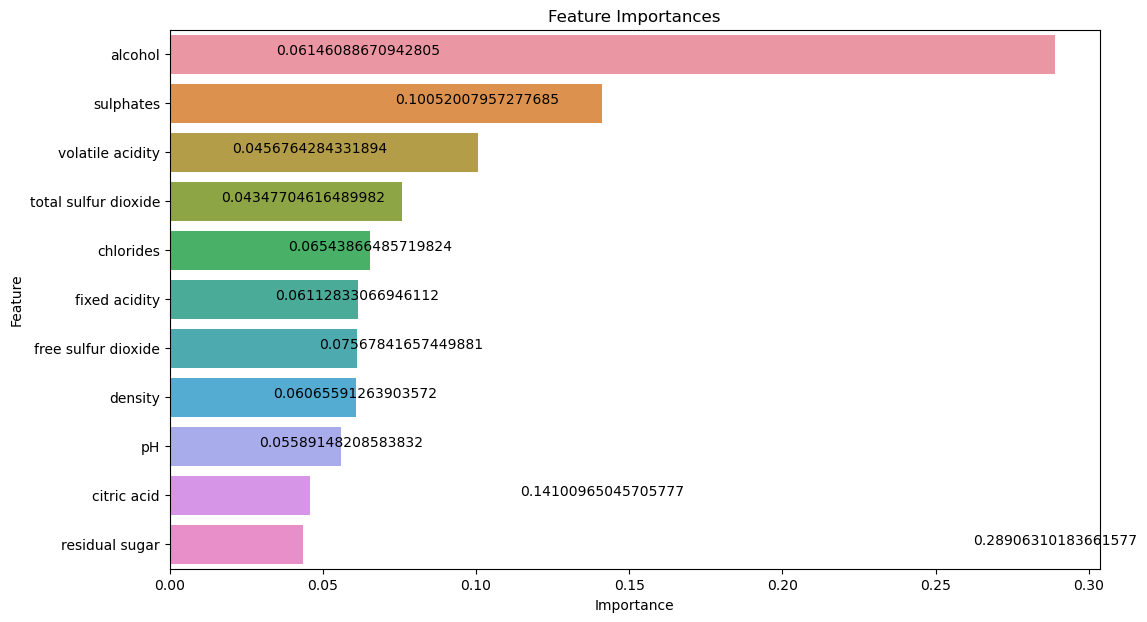

In [75]:
plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=importances_df)
for i in range(len(importances_df)):
    plt.annotate(importances_df['Importance'][i], xy=(importances_df['Importance'][i], i), ha='center')

plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')